In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
basedir = './data/'
data = pd.read_csv(f'{basedir}API_LKA_DS2_en_csv_v2_21470.csv')
data.drop(columns=[data.columns[1], data.columns[3],data.columns[0], 'Unnamed: 68'], inplace=True)

In [21]:
# List of crime-related terms
crime_keywords = ['crime', 'theft', 'fraud', 'offense', 'violence', 'cybercrime', '']

# Create a pattern by joining keywords with '|'
pattern = '|'.join(crime_keywords)

# Filter rows where 'Indicator Name' contains any of the keywords (case-insensitive)
crime_related = data[data['Indicator Name'].str.contains(pattern, case=False, na=False)]

# Display the results
crime_related

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1100.000000,1700.000000,NaN,NaN,NaN,NaN
83,Proportion of women subjected to physical and/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Political Stability and Absence of Violence/Te...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.196386,0.201145,0.206087,0.213936,0.212308,0.229520,0.232470,0.234691,0.233040,NaN
180,Political Stability and Absence of Violence/Te...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,6.000000,6.000000,6.000000,NaN
221,Losses due to theft and vandalism (% of annual...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,Political Stability and Absence of Violence/Te...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.285713,50.476189,46.666668,42.380951,41.037735,40.094341,44.811321,33.018867,18.867924,NaN
632,Political Stability and Absence of Violence/Te...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.238094,59.523811,57.142857,57.142857,53.301888,53.773586,56.603775,47.641510,30.660378,NaN
633,Political Stability and Absence of Violence/Te...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.330464,0.083183,-0.011340,-0.075449,-0.139390,-0.215570,-0.089157,-0.376804,-0.785570,NaN
675,Political Stability and Absence of Violence/Te...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.809525,37.142857,32.857143,30.000000,28.773584,23.584906,27.830189,18.867924,12.735849,NaN
722,Firms experiencing losses due to theft and van...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


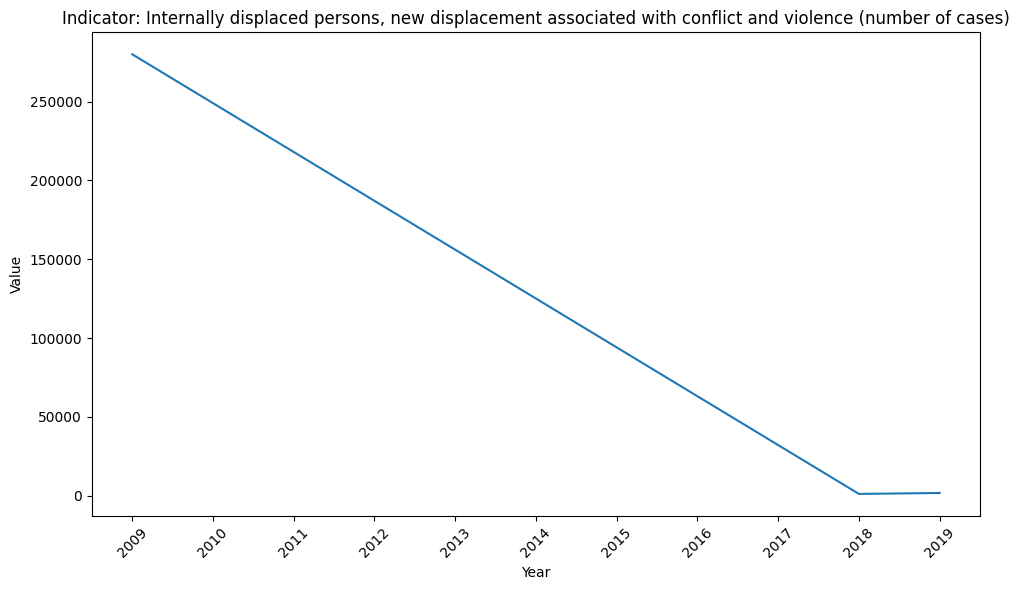

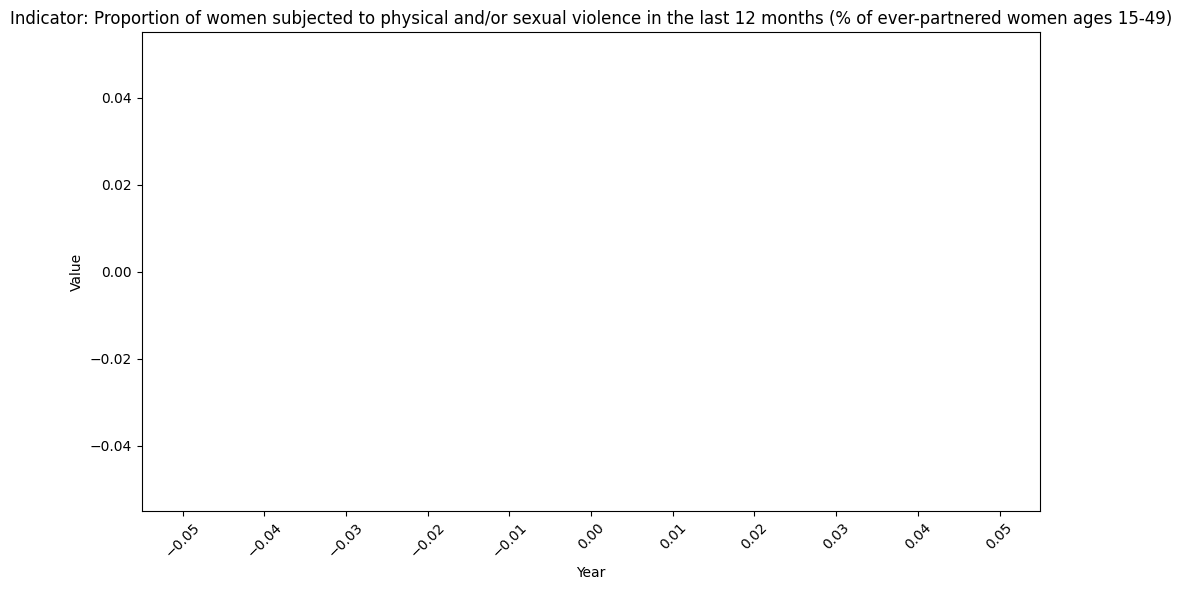

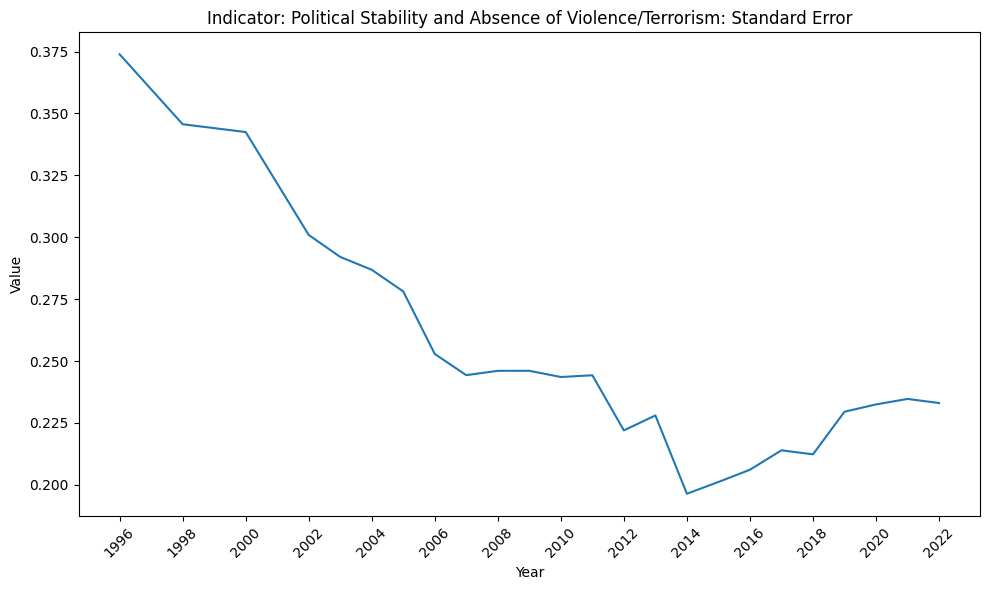

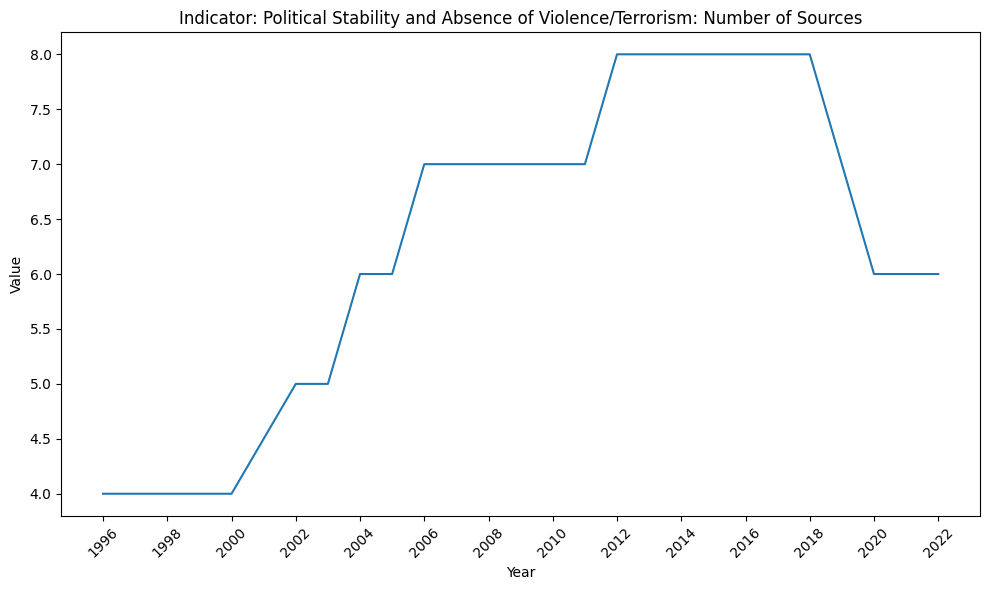

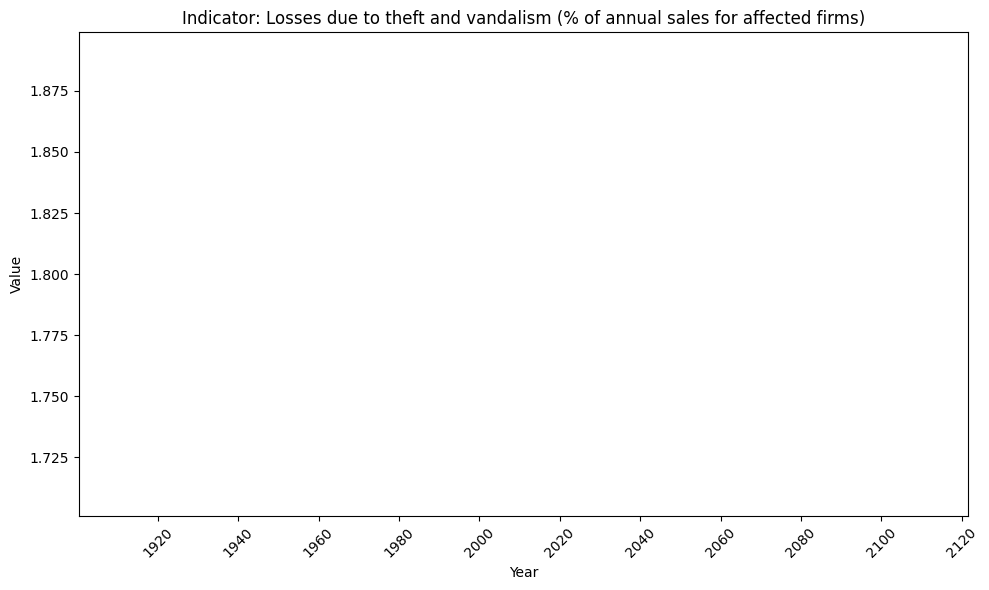

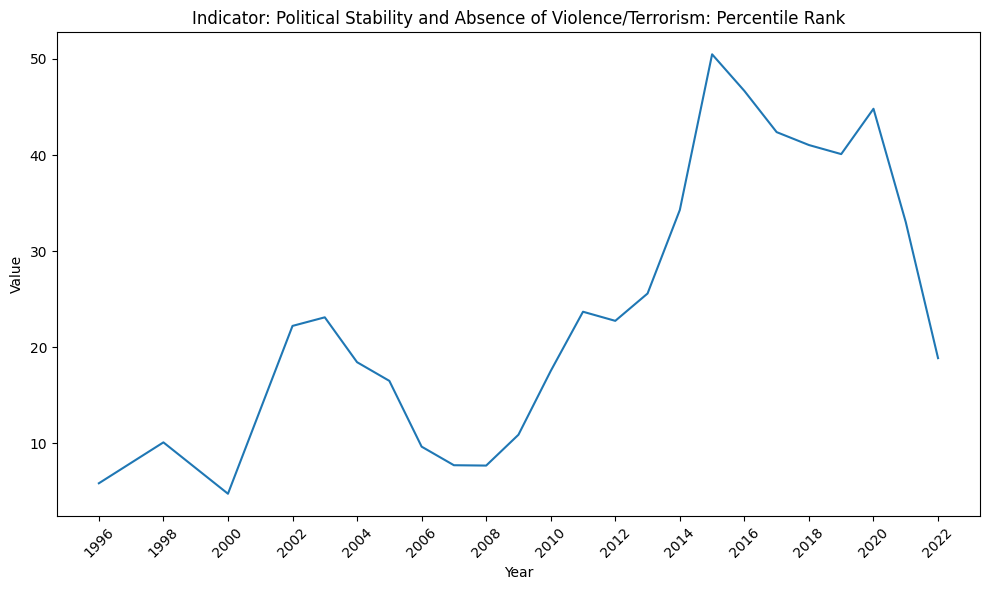

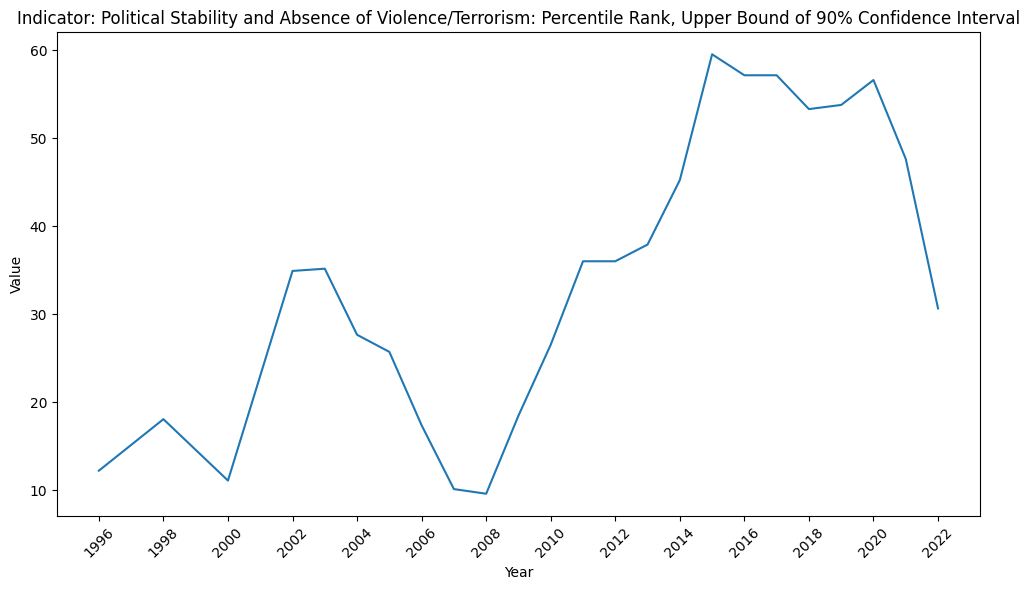

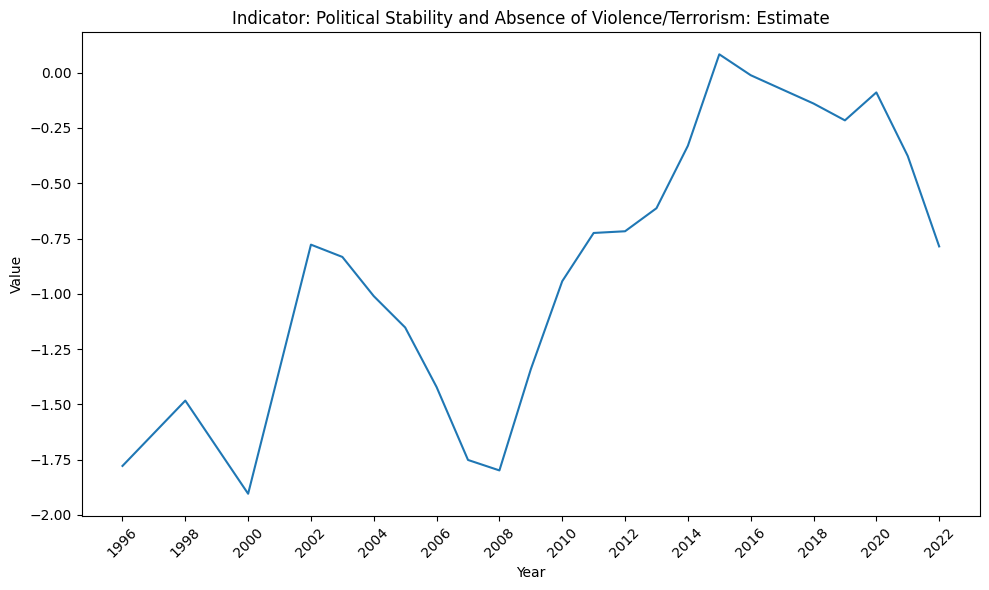

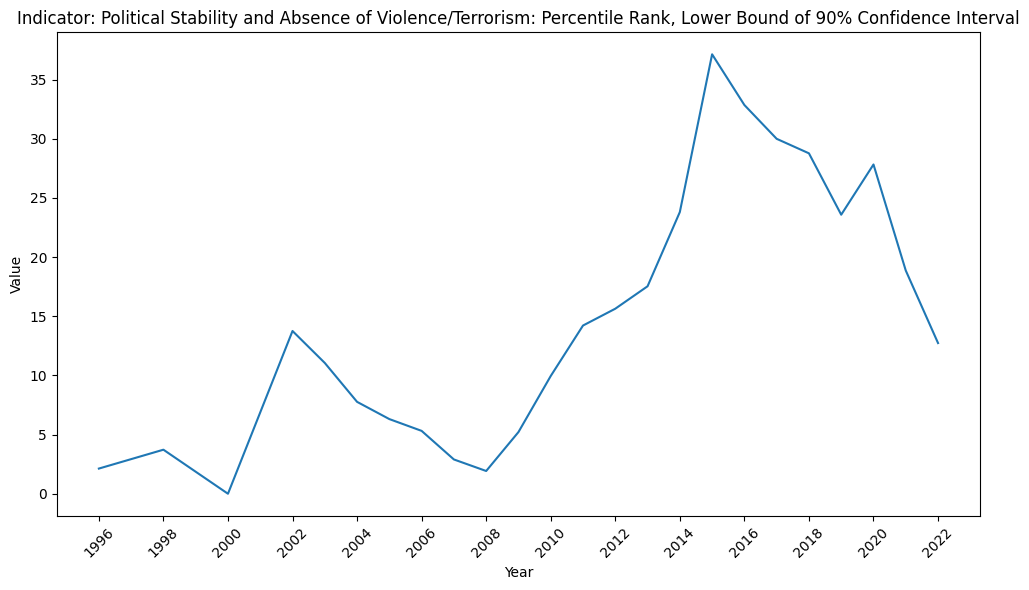

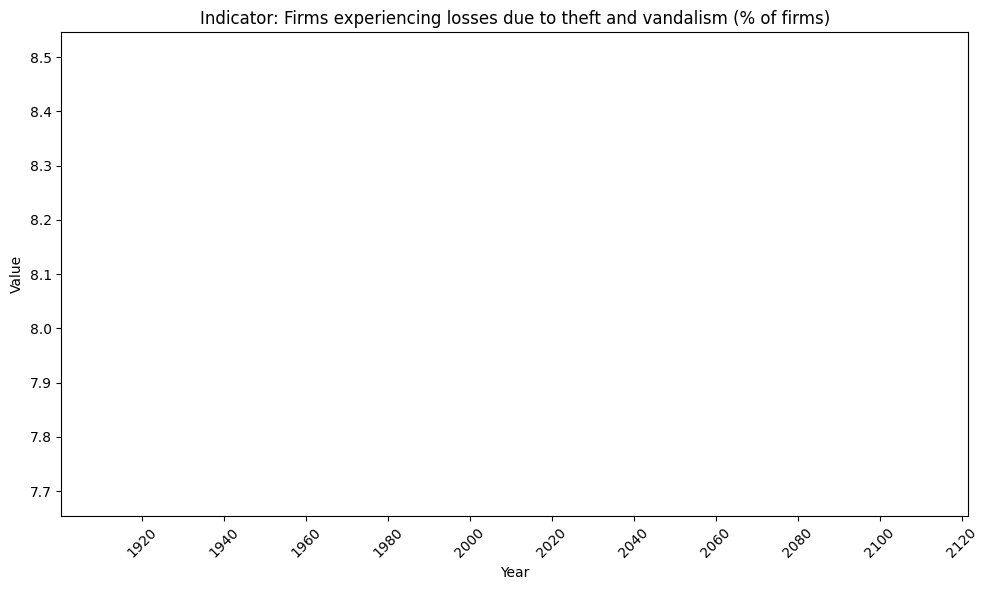

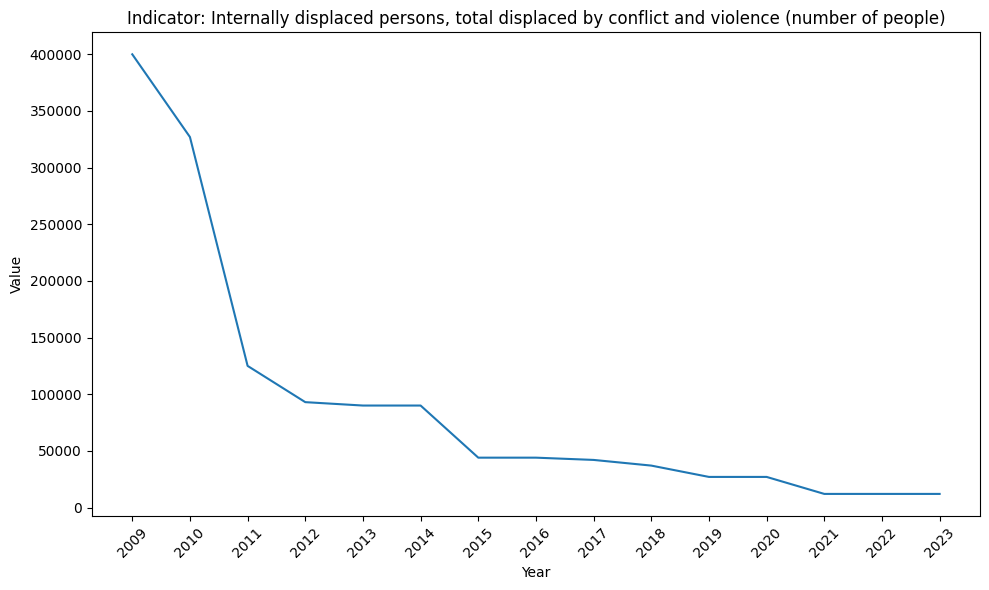

In [29]:
for index, row in crime_related.iterrows():
    indicator_name = row['Indicator Name']  # Get the indicator name
    values = row.iloc[1:]  # Get the values for all years (skip 'Indicator Name')

    # Convert column headers to years (ensure numeric if not already)
    years = crime_related.columns[1:]  # Assuming these are the years
    years = years.astype(int) if years.dtype == 'object' else years

    # Plotting the data for each indicator
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=years, y=values)

    # Tilt the x-axis labels by 45 degrees
    plt.xticks(rotation=45)

    # Set tick intervals on the x-axis
    plt.locator_params(axis='x', nbins=int(len(years) / 3))

    # Add labels and title
    plt.title(f"Indicator: {indicator_name}")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

In [28]:
values

1960       NaN
1961       NaN
1962       NaN
1963       NaN
1964       NaN
         ...  
2019    1700.0
2020       NaN
2021       NaN
2022       NaN
2023       NaN
Name: 1, Length: 64, dtype: object

In [ ]:
# Assuming your data is already loaded in the 'data' DataFrame

# Ensure the first column is the title
titles = data.iloc[:, 0]
data_values = data.iloc[:, 1:]  # Exclude the title column

# Convert the remaining columns to numeric where possible
data_values = data_values.apply(pd.to_numeric, errors='coerce')

# Create directory if not exists
if not os.path.exists('./plots'):
    os.makedirs('./plots')

# Create a figure for each row
for i in range(len(data)):
    title = titles.iloc[i]  # Title from the first column
    row_data = data_values.iloc[i]  # Data for the row
    
    # Generate the x-axis from the column names (assuming years)
    x_axis = data_values.columns
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, row_data, marker='o', linestyle='-')
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    
    # Tilt x-axis labels and show only every 3rd label
    plt.xticks(ticks=np.arange(len(x_axis))[::3], labels=x_axis[::3], rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot
    plot_filename = f'./plots/plot_{i+1}.png'
    plt.savefig(plot_filename)
    
    plt.close()  # Close the plot to avoid displaying it in environments that do so automatically

print("All plots saved in the ./plots directory.")

In [5]:
data

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.163235e+00,3.643795e+00,3.863360e+00,3.842004e+00,3.946635e+00,4.721833e+00,NaN,NaN,NaN,NaN
1,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.100000e+03,1.700000e+03,NaN,NaN,NaN,NaN
2,"Voice and Accountability: Percentile Rank, Low...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.266010e+01,3.054187e+01,3.743842e+01,3.793103e+01,3.737864e+01,3.623188e+01,3.719807e+01,3.623188e+01,3.526570e+01,NaN
3,Travel services (% of commercial service exports),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.361684e+01,4.682171e+01,4.952203e+01,5.104027e+01,5.252830e+01,4.839529e+01,2.267852e+01,2.063562e+01,3.732875e+01,3.822635e+01
4,Commercial service exports (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.573777e+09,6.365963e+09,7.104897e+09,7.689872e+09,8.339558e+09,7.453060e+09,3.009048e+09,2.456455e+09,3.044058e+09,5.409765e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,Rural land area (sq. km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.138613e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1492,Forest area (% of land area),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.386669e+01,3.439517e+01,3.434411e+01,3.429305e+01,3.425805e+01,3.420671e+01,3.415810e+01,3.410702e+01,NaN,NaN
1493,Urban land area where elevation is below 5 met...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.769286e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,Land under cereal production (hectares),NaN,539171.000000,568096.000000,582457.000000,573881.000000,472886.000000,583713.000000,584108.000000,606910.000000,...,9.536550e+05,1.279888e+06,1.215182e+06,8.443290e+05,1.111987e+06,1.021215e+06,1.144961e+06,1.233820e+06,1.198727e+06,NaN
